<a href="https://colab.research.google.com/github/Roopam-kapoor/ML-Algos/blob/main/adaboost_scratch_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions


In [ ]:
df = pd.DataFrame()

In [ ]:

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [ ]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [ ]:
df['weights'] = 1/df.shape[0]

In [ ]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [ ]:
x = df.iloc[:,0:2]
y = df.iloc[:,2]

In [ ]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

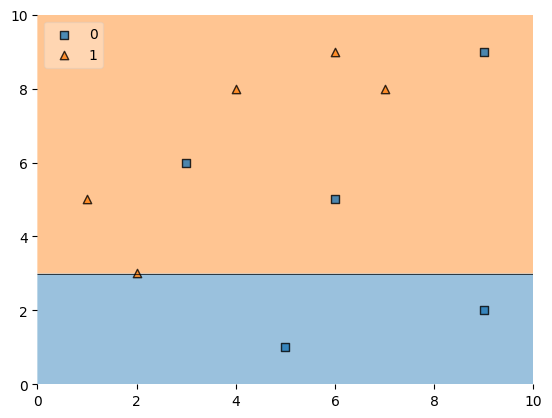

In [ ]:
plot_decision_regions(np.array(x),np.array(y),dt1, legend = 2)

In [ ]:
df['y_pred'] = dt1.predict(x)

In [ ]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [ ]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [ ]:
def Error(df):
    return df[df['y_pred'] != df['label']]['weights'].sum()

In [ ]:
error = Error(df)

In [ ]:
alpha1 = calculate_model_weight(error)

In [ ]:
error

0.30000000000000004

In [ ]:
alpha1

0.4236489301936017

In [ ]:
def update_weights(row, alpha):
  if(row['y_pred'] == row['label']):
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [ ]:
df['updated_weights'] = df.apply(update_weights, axis = 1, args = (alpha1,))

In [ ]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,1,0.152753
3,4,8,1,0.1,1,0.065465
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,1,0.065465
6,6,5,0,0.1,1,0.152753
7,7,8,1,0.1,1,0.065465
8,9,9,0,0.1,1,0.152753
9,9,2,0,0.1,0,0.065465


In [ ]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [ ]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,1,0.152753,0.166667
3,4,8,1,0.1,1,0.065465,0.071429
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,1,0.065465,0.071429
6,6,5,0,0.1,1,0.152753,0.166667
7,7,8,1,0.1,1,0.065465,0.071429
8,9,9,0,0.1,1,0.152753,0.166667
9,9,2,0,0.1,0,0.065465,0.071429


In [ ]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [ ]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper
0,1,5,1,0.1,1,0.065465,0.071429,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.142857
2,3,6,0,0.1,1,0.152753,0.166667,0.309524
3,4,8,1,0.1,1,0.065465,0.071429,0.380952
4,5,1,0,0.1,0,0.065465,0.071429,0.452381
5,6,9,1,0.1,1,0.065465,0.071429,0.523810
6,6,5,0,0.1,1,0.152753,0.166667,0.690476
7,7,8,1,0.1,1,0.065465,0.071429,0.761905
8,9,9,0,0.1,1,0.152753,0.166667,0.928571
9,9,2,0,0.1,0,0.065465,0.071429,1.000000


In [ ]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [ ]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065465,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.071429,0.142857,0.071429
2,3,6,0,0.1,1,0.152753,0.166667,0.309524,0.142857
3,4,8,1,0.1,1,0.065465,0.071429,0.380952,0.309524
4,5,1,0,0.1,0,0.065465,0.071429,0.452381,0.380952
5,6,9,1,0.1,1,0.065465,0.071429,0.523810,0.452381
6,6,5,0,0.1,1,0.152753,0.166667,0.690476,0.523810
7,7,8,1,0.1,1,0.065465,0.071429,0.761905,0.690476
8,9,9,0,0.1,1,0.152753,0.166667,0.928571,0.761905
9,9,2,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [ ]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065465,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.071429,0.142857,0.071429
2,3,6,0,0.1,1,0.152753,0.166667,0.309524,0.142857
3,4,8,1,0.1,1,0.065465,0.071429,0.380952,0.309524
4,5,1,0,0.1,0,0.065465,0.071429,0.452381,0.380952
5,6,9,1,0.1,1,0.065465,0.071429,0.523810,0.452381
6,6,5,0,0.1,1,0.152753,0.166667,0.690476,0.523810
7,7,8,1,0.1,1,0.065465,0.071429,0.761905,0.690476
8,9,9,0,0.1,1,0.152753,0.166667,0.928571,0.761905
9,9,2,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [ ]:
def new_dataset(df):
  indices = []
  for i in range(df.shape[0]):
    x = np.random.random()
    for index, row in df.iterrows():
      if(x>=row['cumsum_lower']) and (x<=row['cumsum_upper']):
        indices.append(index)
  return indices

In [ ]:
index_values = new_dataset(df)

In [ ]:
index_values

[7, 8, 2, 1, 0, 4, 3, 7, 1, 0]

In [ ]:
second_df = df.iloc[index_values, [0,1,2,3]]

In [ ]:
second_df

,X1,X2,label,weights
7,7,8,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
1,2,3,1,0.1
0,1,5,1,0.1
4,5,1,0,0.1
3,4,8,1,0.1
7,7,8,1,0.1
1,2,3,1,0.1
0,1,5,1,0.1


In [ ]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [ ]:
dt2.fit(second_df.iloc[:,0:2],second_df.iloc[:,2])

DecisionTreeClassifier(max_depth=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

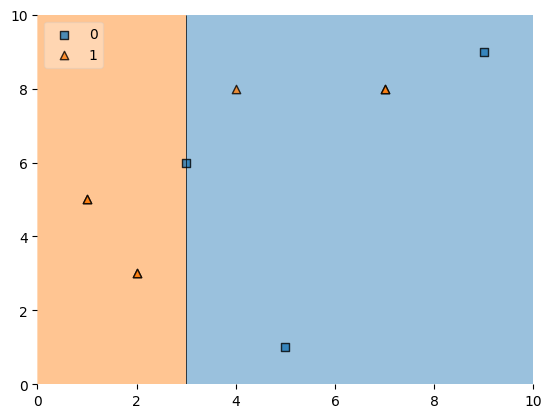

In [ ]:
plot_decision_regions(np.array(second_df.iloc[:,0:2]),np.array(second_df.iloc[:,2]),dt2, legend = 2)

In [ ]:
second_df['y_pred'] = dt2.predict(second_df.iloc[:,0:2])

In [ ]:
error2 = Error(second_df)

In [ ]:
alpha2 = calculate_model_weight(error2)

In [ ]:
second_df['updated_weights'] = second_df.apply(update_weights, axis = 1, args = (alpha2,))

In [ ]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [ ]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [ ]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [ ]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
7,7,8,1,0.1,0,0.152753,0.166667,0.166667,0.000000
8,9,9,0,0.1,0,0.065465,0.071429,0.238095,0.166667
2,3,6,0,0.1,0,0.065465,0.071429,0.309524,0.238095
1,2,3,1,0.1,1,0.065465,0.071429,0.380952,0.309524
0,1,5,1,0.1,1,0.065465,0.071429,0.452381,0.380952
4,5,1,0,0.1,0,0.065465,0.071429,0.523810,0.452381
3,4,8,1,0.1,0,0.152753,0.166667,0.690476,0.523810
7,7,8,1,0.1,0,0.152753,0.166667,0.857143,0.690476
1,2,3,1,0.1,1,0.065465,0.071429,0.928571,0.857143
0,1,5,1,0.1,1,0.065465,0.071429,1.000000,0.928571


In [ ]:
index_values2 = new_dataset(second_df)

In [ ]:
index_values2

[8, 7, 3, 7, 2, 0, 4, 7, 4, 4]

In [ ]:
third_df = second_df.iloc[index_values2, [0,1,2,3]]

In [ ]:
third_df

,X1,X2,label,weights
1,2,3,1,0.1
7,7,8,1,0.1
1,2,3,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1


In [ ]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [ ]:
dt3.fit(third_df.iloc[:,0:2],third_df.iloc[:,2])

DecisionTreeClassifier(max_depth=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

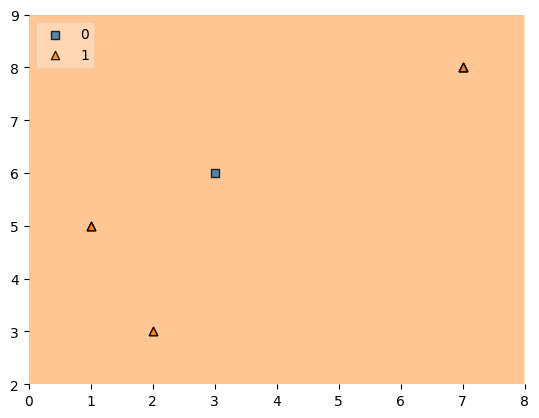

In [ ]:
plot_decision_regions(np.array(third_df.iloc[:,0:2]),np.array(third_df.iloc[:,2]),dt3, legend = 2)

In [ ]:

third_df['y_pred'] = dt3.predict(third_df.iloc[:,0:2])

In [ ]:
error3 = Error(third_df)

In [ ]:
alpha3 = calculate_model_weight(error3)

In [ ]:
print(alpha1, alpha2, alpha3)

0.4236489301936017 0.4236489301936017 1.0986122886681098


In [ ]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
query = np.array([1,5]).reshape(1,2)
dt2.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
dt3.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
alpha1*dt1.predict(query) + alpha2*dt2.predict(query) + alpha3*dt3.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1.94591015])

In [ ]:
np.sign(alpha1*dt1.predict(query) + alpha2*dt2.predict(query) + alpha3*dt3.predict(query))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [ ]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
np.sign(alpha1*dt1.predict(query) + alpha2*dt2.predict(query) + alpha3*dt3.predict(query))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1.])